In [24]:
from whitebox import WhiteboxTools
import os
import geopandas as gpd
import numpy as np
from rasterio import features
import rasterio
import matplotlib.pyplot as plt

In [25]:
wbt = WhiteboxTools()

In [26]:
reprojected_dem_file = os.path.join('../data', 'reprojected_dem.tif')
reprojected_dem_file = os.path.abspath(reprojected_dem_file)
reprojected_dem_file

'/Users/cubics/GBLU-code/data/reprojected_dem.tif'

In [27]:
# get the root dir
base_path = os.path.dirname(os.path.abspath(reprojected_dem_file))
base_path

'/Users/cubics/GBLU-code/data'

In [28]:
# get absolute path of reprojected_dem_file
slope_path = os.path.join(base_path, 'slope.tif')

wbt.slope(reprojected_dem_file, slope_path,units="degrees")

./whitebox_tools --run="Slope" --dem='/Users/cubics/GBLU-code/data/reprojected_dem.tif' --output='/Users/cubics/GBLU-code/data/slope.tif' --units=degrees -v --compress_rasters=False

****************************
* Welcome to Slope         *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 

0

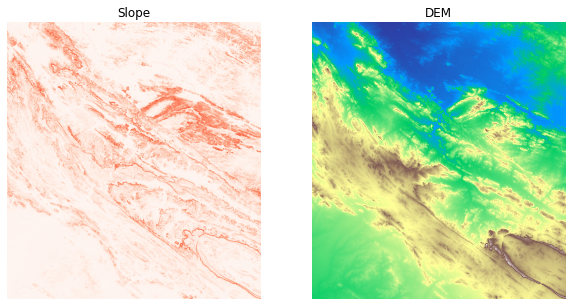

In [29]:
# plot the slope and dem
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
with rasterio.open(slope_path) as src:
    slope = src.read(1, masked=True)
    axs[0].imshow(slope, cmap='Reds')
    axs[0].set_title('Slope')
    axs[0].axis('off')

with rasterio.open(reprojected_dem_file) as src:
    dem = src.read(1, masked=True)
    axs[1].imshow(dem, cmap='terrain')
    axs[1].set_title('DEM')
    axs[1].axis('off')

In [30]:
# reclassify the slope
reclassified_slope_path = os.path.join(base_path, 'reclassified_slope.tif')
reclass_vals = '1;0;1.5;0;1.5;100'
wbt.reclass(slope_path, reclassified_slope_path, reclass_vals)
# set reclassified slope to nodata
wbt.set_nodata_value(reclassified_slope_path,reclassified_slope_path, 0)

./whitebox_tools --run="Reclass" --input='/Users/cubics/GBLU-code/data/slope.tif' --output='/Users/cubics/GBLU-code/data/reclassified_slope.tif' --reclass_vals='1;0;1.5;0;1.5;100' -v --compress_rasters=False

****************************
* Welcome to Reclass       *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 

0

In [ ]:
# raster to vector
flat_core_vector = os.path.join(base_path, 'flat_core.shp')
wbt.raster_to_vector_polygons(reclassified_slope_path, flat_core_vector)

./whitebox_tools --run="RasterToVectorPolygons" --input='/Users/cubics/GBLU-code/data/reclassified_slope.tif' --output='/Users/cubics/GBLU-code/data/plain.shp' -v --compress_rasters=False

*************************************
* Welcome to RasterToVectorPolygons *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Clumping polygons: 0%
Clumping polygons: 1%
Clumping polygons: 2%
Clumping polygons: 3%
Clumping polygons: 4%
Clumping polygons: 5%
Clumping polygons: 6%
Clumping polygons: 7%
Clumping polygons: 8%
Clumping polygons: 9%
Clumping polygons: 10%
Clumping polygons: 11%
Clumping polygons: 12%
Clumping polygons: 13%
Clumping polygons: 14%
Clumping polygons: 15%
Clumping polygons: 16%
Clumping polygons: 17%
Clumping polygons: 18%
Clumping polygons: 19%
Clumping polygons: 20%
Clumping polygons: 21%
Clumping polygons: 22%
Clumping polygons: 23%
Clumping polygons: 24%
Clumping polygons: 25%
Clumping polygons

0

In [ ]:
# delete the polygon which area is less than 0.1

gdf = gpd.read_file(flat_core_vector)
gdf['area'] = gdf.area
gdf = gdf[gdf['area'] > 100000]
# save the gdf to shapefile
gdf.to_file(flat_core_vector, driver='ESRI Shapefile')

In [ ]:
# transform the shapefile to raster
filtered_flat_core_raster = os.path.join(base_path, 'filtered_flat_core.tif')
# get cell size from reprojected_dem_file
with rasterio.open(reprojected_dem_file) as src:
    cell_size = src.res[0]

# read the vector data
vector_data = gpd.read_file(flat_core_vector)

# open the reprojected_dem_file
with rasterio.open(reprojected_dem_file) as src:
    meta = src.meta.copy()
    transform = src.transform
    
    # prepare the output array
    out_arr = np.zeros((src.height, src.width), dtype=np.uint8)
    
    # shapes
    shapes = [(geom, value) for geom, value in zip(vector_data.geometry, vector_data.VALUE)]
    
    burned = features.rasterize(
        shapes=shapes,
        fill=0,  # background value
        out=out_arr,
        transform=transform
    )
    
    # update the metadata
    meta.update(dtype=rasterio.uint8, count=1, nodata=0)
    
    # save the raster
    with rasterio.open(filtered_flat_core_raster, 'w', **meta) as dst:
        dst.write(burned, 1)

In [ ]:
# calculate the accumulated slope
accumulated_slope_path = os.path.join(base_path, 'accumulated_slope.tif')
out_backlink = os.path.join(base_path, 'backlink.tif')

wbt.cost_distance(
    source = filtered_flat_core_raster, 
    cost = slope_path, 
    out_accum = accumulated_slope_path, 
    out_backlink = out_backlink, 
)

./whitebox_tools --run="CostDistance" --source='/Users/cubics/GBLU-code/data/filtered_plain_core.tif' --cost='/Users/cubics/GBLU-code/data/slope.tif' --out_accum='/Users/cubics/GBLU-code/data/accumulated_slope.tif' --out_backlink='/Users/cubics/GBLU-code/data/backlink.tif' -v --compress_rasters=False

****************************
* Welcome to CostDistance  *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading source data...
Reading cost data...
Initializing: 0%
Initializing: 1%
Initializing: 2%
Initializing: 3%
Initializing: 4%
Initializing: 5%
Initializing: 6%
Initializing: 7%
Initializing: 8%
Initializing: 9%
Initializing: 10%
Initializing: 11%
Initializing: 12%
Initializing: 13%
Initializing: 14%
Initializing: 15%
Initializing: 16%
Initializing: 17%
Initializing: 18%
Initializing: 19%
Initializing: 20%
Initializing: 21%
Initializing: 22%
Initializing: 23%
Initializing: 24%
Initializing: 25%
Initializing: 26%
Initializing: 27%
Initializing: 

0

In [ ]:
# reclassify the accumulated slope
reclassified_accumulated_slope_path = os.path.join(base_path, 'reclassified_flat_ruggeds.tif')
# accumulated slope reclassification, 0-1500 means 1 - flat, 1500-100000 means 2 - rugged
reclass_vals = '1;0;1500;2;1500;100000'
wbt.reclass(accumulated_slope_path, reclassified_accumulated_slope_path, reclass_vals)

./whitebox_tools --run="Reclass" --input='/Users/cubics/GBLU-code/data/accumulated_slope.tif' --output='/Users/cubics/GBLU-code/data/reclassified_plain_mountains.tif' --reclass_vals='1;0;1500;2;1500;100000' -v --compress_rasters=False

****************************
* Welcome to Reclass       *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 4

0

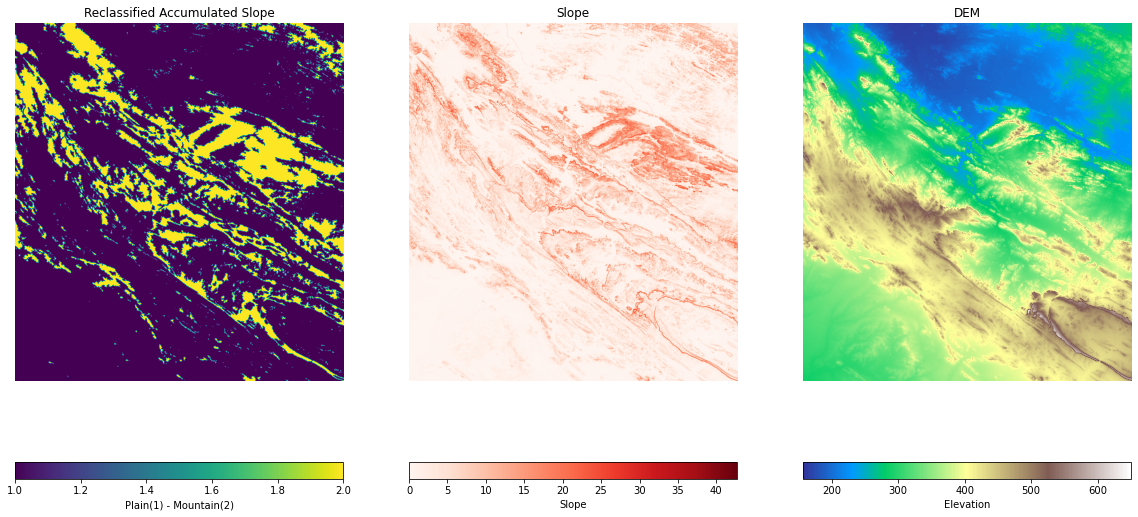

In [ ]:
# plot the reclassified accumulated slope
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
with rasterio.open(reclassified_accumulated_slope_path) as src:
    rugged_flat = src.read(1, masked=True)
    axs[0].imshow(rugged_flat)
    axs[0].set_title('Reclassified Accumulated Slope')
    axs[0].axis('off')
    # legend
    cbar = plt.colorbar(axs[0].imshow(rugged_flat), ax=axs[0], orientation='horizontal')
    cbar.set_label('flat(1) - rugged(2)')

with rasterio.open(slope_path) as src:
    slope = src.read(1, masked=True)
    axs[1].imshow(slope, cmap='Reds')
    axs[1].set_title('Slope')
    axs[1].axis('off')
    # legend
    cbar = plt.colorbar(axs[1].imshow(slope, cmap='Reds'), ax=axs[1], orientation='horizontal')
    cbar.set_label('Slope')

with rasterio.open(reprojected_dem_file) as src:
    dem = src.read(1, masked=True)
    axs[2].imshow(dem, cmap='terrain')
    axs[2].set_title('DEM')
    axs[2].axis('off')
    # legend
    cbar = plt.colorbar(axs[2].imshow(dem, cmap='terrain'), ax=axs[2], orientation='horizontal')
    cbar.set_label('Elevation')
